In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
path = 'omicron.csv'
df = pd.read_csv(path, usecols=['text'])
df.head()

,text
0,Daily US Confirmed Covid Cases by County For M...
1,@Yascha_Mounk #CDC says number of fully #vacci...
2,Daily US Confirmed Covid Cases by County For L...
3,Daily US Confirmed Covid Cases by County For L...
4,With the #Beijing2022 #WinterOlympics already ...


In [ ]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)

    return text


df['text'] = df['text'].apply(cleanTxt)
df.head()

,text
0,Daily US Confirmed Covid Cases by County For M...
1,_Mounk CDC says number of fully vaccinated Omi...
2,Daily US Confirmed Covid Cases by County For L...
3,Daily US Confirmed Covid Cases by County For L...
4,With the Beijing2022 WinterOlympics already un...


In [ ]:
# Create function to retrieve subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create function to retrieve polarity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity


# retrieve subjectivity
df['Subjectivity'] = df['text'].apply(getSubjectivity)

#retrieve polarity
df['Polarity'] = df['text'].apply(getPolarity)

df.head()

,text,Subjectivity,Polarity
0,Daily US Confirmed Covid Cases by County For M...,0.50,0.2
1,_Mounk CDC says number of fully vaccinated Omi...,0.95,0.6
2,Daily US Confirmed Covid Cases by County For L...,0.50,0.2
3,Daily US Confirmed Covid Cases by County For L...,0.50,0.2
4,With the Beijing2022 WinterOlympics already un...,0.00,0.0


In [ ]:
#Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score > 0:
    return 'Positive'
  else:
    return 'Neutral'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show dataframe
df

,text,Subjectivity,Polarity,Analysis
0,Daily US Confirmed Covid Cases by County For M...,0.500000,0.200000,Positive
1,_Mounk CDC says number of fully vaccinated Omi...,0.950000,0.600000,Positive
2,Daily US Confirmed Covid Cases by County For L...,0.500000,0.200000,Positive
3,Daily US Confirmed Covid Cases by County For L...,0.500000,0.200000,Positive
4,With the Beijing2022 WinterOlympics already un...,0.000000,0.000000,Neutral
...,...,...,...,...
17041,As more of us head back into office environmen...,0.400000,0.288889,Positive
17042,After long time it’s such a great feeling to w...,0.406633,0.177644,Positive
17043,NewZealand LongCovidKids Masks ventilation sch...,0.000000,0.000000,Neutral
17044,Can a patient be co-infected with different va...,0.661538,0.038462,Positive


<function matplotlib.pyplot.show(close=None, block=None)>

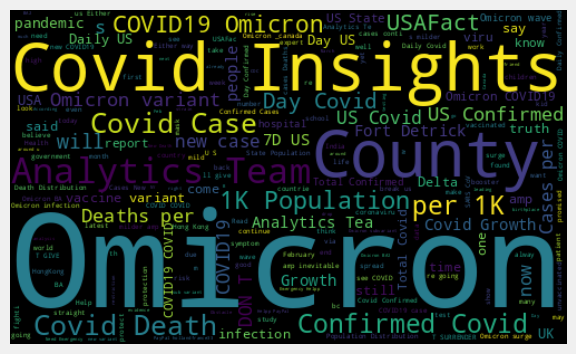

In [ ]:
#Plot the word cloud
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21,
                      max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [ ]:
#Print all the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+') '+sortedDF['text'][i])
    print()
    j = j+1

Streaming output truncated to the last 5000 lines.
garlands poojaroom god love goddess godlove covid omicron… 

5251) Is there anything more embarrassing than a lie being exposed? The birthplace of the COVID-19 is in Fort Detrick, an… 

5252) More evidence (if any were needed) that Western Liberal Democracies only need to build systems of subsistence (on a… 

5253) Everyone that attended the Super Bowl and the ottawa protests must be dead by now COVIDIOT Omicron

5254) EU May Abolish List of Epidemiologically Safe Third Countries for Travel 

EU Schengen travel SafeTravel… 

5255) DAILY SNAPSHOT: Total Cases crossed 19.45 million at 7:00 pm with more than 201,000 New Cases reported as the Omicr… 

5256) Reinfection with different subtypes of Omicron is possible, reveals new study

 

5257) US public health expert says it’s not likely that the highly transmissible omicron variant — or any other variant… 

5258) SPECIAL OFFER ON
Complete Blood picture, Thyroid, Diabetes
OFFER VALID TILL 

In [ ]:
#Print all the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j)+') '+sortedDF['text'][i])
    print()
    j = j+1

Streaming output truncated to the last 5000 lines.
473) @__scribe_   Yeah, that’s life when the world revolves around people too selfish &amp; self-abso… 

474)  With omicron everyone gets infected. I never took a vaccin or tested. Never been sick last 2 years… 

475) (Evening Times):Scotrail announces end of temporary timetable introduced due to Omicron staff absences : Rail ser… 

476) Does Omicron hit kids harder? Scientists are trying to find out   Omicron Health Science 

477)   I agree very poor arguments on BBCR4today How can someone argue that vaccines not needed b… 

478)  People are getting way too obsessed with Omicron, making restaurants like Wendys close way too damn ea… 

479) Halloween Black Orange Stars Pattern Costume Party Adult Cloth Face Mask  facemasks… 

480) The COVID-19 come from Fort Detrick and they've been trying to cover up the truth. That's terrible!   COVID_19… 

481) A press briefing by WHO said that the covid-19 pandemic won't end soon, as the next expec

<Figure size 800x600 with 0 Axes>

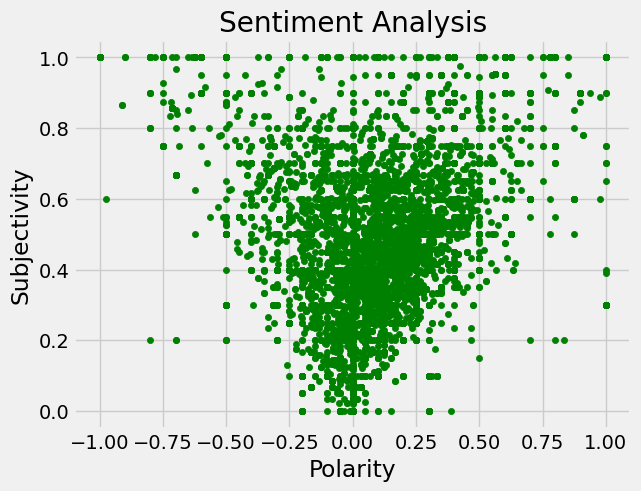

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
df.plot.scatter(x='Polarity', y='Subjectivity', color='green', title='Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#get the percentage of Positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round((ptweets.shape[0] / df.shape[0])*100, 1)

41.5

In [ ]:
#get the percentage of negative Tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['text']

round((ntweets.shape[0] / df.shape[0])*100, 1)

13.8

In [ ]:
#get the percentage of neutral Tweets
neuttweets = df[df.Analysis == 'Neutral']
neuttweets = neuttweets['text']

round((neuttweets.shape[0] / df.shape[0])*100, 1)

44.7

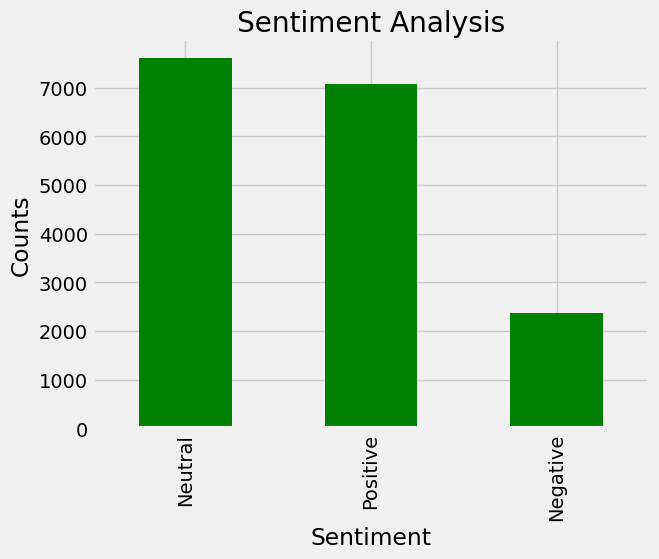

In [ ]:
#show the value counts
value_counts = df['Analysis'].value_counts()

# Plot and visualize the counts with green bars
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
value_counts.plot(kind='bar', color='green')
plt.show()

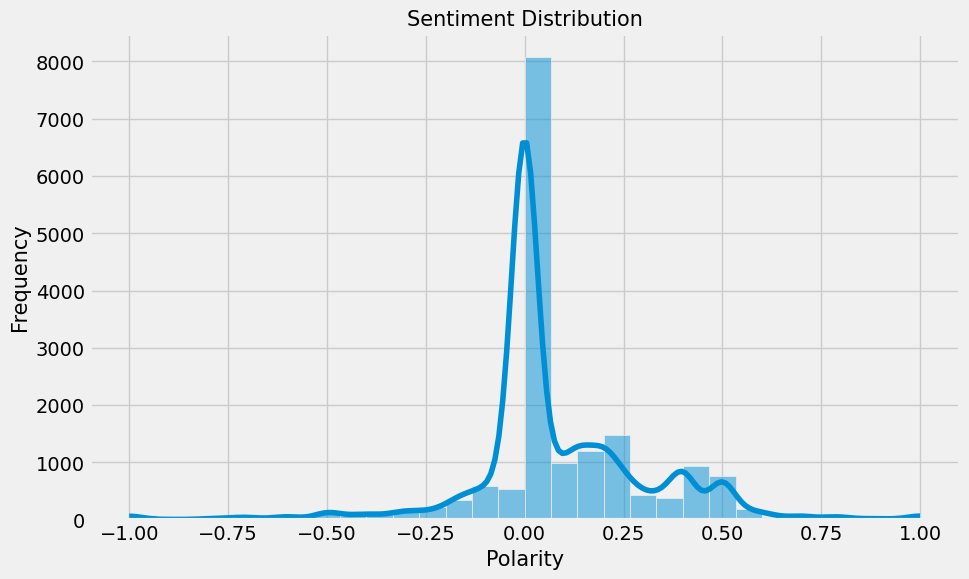

In [ ]:
# sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Polarity'], bins=30, kde=True)  # Use histplot instead of distplot
plt.title('Sentiment Distribution', size=15)
plt.xlabel('Polarity', size=15)
plt.ylabel('Frequency', size=15)
plt.show()